## Data Preprocessing

### Firstly we need to know about the variables in the sss.nc database, so we can proceed further

In [1]:
import netCDF4 as nc

# Open the NetCDF file
file_path = './sss.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# List the variable names in the file
variable_names = netcdf_file.variables.keys()

# Print the variable names
print("Variable names in the NetCDF file:")
for var_name in variable_names:
    print(var_name)

# Close the NetCDF file
netcdf_file.close()

Variable names in the NetCDF file:
LON173_180
LAT180_187
LEV1_19
LEV1_19_bnds
TIME
TIME_bnds
SALT


In [2]:
years_train = list(range(1871, 2011))
years_test = list(range(2011, 2016))

### Now we need to see some sample values and their dimension, to get better understanding of the data

In [3]:
import netCDF4 as nc

# Open the NetCDF file
file_path = './sss.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# Access and print data for all variables
for var_name in netcdf_file.variables:
    variable_data = netcdf_file[var_name][:]
    print(f"\nData for '{var_name}' Variable:")
    print(variable_data)

# Close the NetCDF file
netcdf_file.close()


Data for 'LON173_180' Variable:
[86.25 86.75 87.25 87.75 88.25 88.75 89.25 89.75]

Data for 'LAT180_187' Variable:
[14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75]

Data for 'LEV1_19' Variable:
[  5.01  15.07  25.28  35.76  46.61  57.98  70.02  82.92  96.92 112.32
 129.49 148.96 171.4  197.79 229.48 268.46 317.65 381.39 465.91]

Data for 'LEV1_19_bnds' Variable:
[[-2.00000e-02  1.00400e+01]
 [ 1.00400e+01  2.01750e+01]
 [ 2.01750e+01  3.05200e+01]
 [ 3.05200e+01  4.11850e+01]
 [ 4.11850e+01  5.22950e+01]
 [ 5.22950e+01  6.40000e+01]
 [ 6.40000e+01  7.64700e+01]
 [ 7.64700e+01  8.99200e+01]
 [ 8.99200e+01  1.04620e+02]
 [ 1.04620e+02  1.20905e+02]
 [ 1.20905e+02  1.39225e+02]
 [ 1.39225e+02  1.60180e+02]
 [ 1.60180e+02  1.84595e+02]
 [ 1.84595e+02  2.13635e+02]
 [ 2.13635e+02  2.48970e+02]
 [ 2.48970e+02  2.93055e+02]
 [ 2.93055e+02  3.49520e+02]
 [ 3.49520e+02  4.23650e+02]
 [ 4.23650e+02  5.22610e+02]]

Data for 'TIME' Variable:
[683019. 683050. 683078. ... 734061. 734092. 734122.]


In [4]:
import netCDF4 as nc

# Open the NetCDF file
file_path = './sss.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# Access and print data for all variables, along with their shapes and lengths
for var_name in netcdf_file.variables:
    variable = netcdf_file[var_name]
    variable_data = variable[:]
    print(f"\nData for '{var_name}' Variable:")
    print("Shape:", variable_data.shape)  # Get the shape (matrix format)
    print("Number of Dimensions:", len(variable.dimensions))
    for dim_name in variable.dimensions:
        dim = netcdf_file.dimensions[dim_name]
        print(f"Length of Dimension '{dim_name}': {len(dim)}")

# Close the NetCDF file
netcdf_file.close()


Data for 'LON173_180' Variable:
Shape: (8,)
Number of Dimensions: 1
Length of Dimension 'LON173_180': 8

Data for 'LAT180_187' Variable:
Shape: (8,)
Number of Dimensions: 1
Length of Dimension 'LAT180_187': 8

Data for 'LEV1_19' Variable:
Shape: (19,)
Number of Dimensions: 1
Length of Dimension 'LEV1_19': 19

Data for 'LEV1_19_bnds' Variable:
Shape: (19, 2)
Number of Dimensions: 2
Length of Dimension 'LEV1_19': 19
Length of Dimension 'bnds': 2

Data for 'TIME' Variable:
Shape: (1680,)
Number of Dimensions: 1
Length of Dimension 'TIME': 1680

Data for 'TIME_bnds' Variable:
Shape: (1680, 2)
Number of Dimensions: 2
Length of Dimension 'TIME': 1680
Length of Dimension 'bnds': 2

Data for 'SALT' Variable:
Shape: (1680, 19, 8, 8)
Number of Dimensions: 4
Length of Dimension 'TIME': 1680
Length of Dimension 'LEV1_19': 19
Length of Dimension 'LAT180_187': 8
Length of Dimension 'LON173_180': 8


#### Here the dimension of salt is (1680, 19, 8, 8)
Where first index represents Time, second represent depth, third latitude, and fourth longitude
As we are only working with surface's salt level, we would consider first value of depth i.e. 5.01 that will be constant in all case

#### Now first we will store all variables in array

In [5]:
import netCDF4 as nc
import numpy as np

# Open the NetCDF file
file_path = './sss.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# Create a dictionary to store variables
variables_data = {}

# Access and store data for all variables in the dictionary
for var_name in netcdf_file.variables:
    variable_data = netcdf_file[var_name][:]
    variables_data[var_name] = variable_data

# Close the NetCDF file
netcdf_file.close()

### Creating Training Dataset

In [6]:
import csv

# Define the CSV file name
csv_filename = './train.csv'

# Open the CSV file for writing
with open(csv_filename, mode='w', newline='') as csv_file:
    # Create a CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header row to the CSV file
    csv_writer.writerow(['a', 'c', 'd', 'salt_value'])

    for a in variables_data['TIME']:
        for c in variables_data['LAT180_187']:
            for d in variables_data['LON173_180']:
                # Since 'a', 'b', 'c', and 'd' are values from dimensions, you can use them to index 'SALT'
                a_index = variables_data['TIME'][:].tolist().index(a)
                b_index = 0
                c_index = variables_data['LAT180_187'][:].tolist().index(c)
                d_index = variables_data['LON173_180'][:].tolist().index(d)

                # Now, you can use the indices to access 'SALT'
                salt_value = variables_data['SALT'][a_index, b_index, c_index, d_index]
                
                # Write the current values to the CSV file
                csv_writer.writerow([a, c, d, salt_value])

print(f'Data has been saved to {csv_filename}')

Data has been saved to ./train.csv


### Creating Test Dataset

Here a contains time of upcoming years [Jan 2011, Feb 2011, ..... Nov 2015, Dec 2015]
As analysis from previous data, we can see that a represents last day of the month. So continuing the pattern, we get the remaning values

In [7]:
a = [734153, 734184, 734212, 734243, 734273, 734304, 734334, 734365, 734396, 734426, 734457, 734487, 734518, 734549, 734578, 734609, 734639, 734670, 734700, 734731, 734762, 734792, 734823, 734853, 734884, 734915, 734943, 734974, 735004, 735035, 735065, 735096, 735127, 735157, 735188, 735218, 735249, 735280, 735308, 735339, 735369, 735400, 735430, 735461, 735492, 735522, 735553, 735583, 735614, 735645, 735673, 735704, 735734, 735765, 735795, 735826, 735857, 735887, 735918, 735948]
b = 5.01
c = [14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75]
d = [86.25, 86.75, 87.25, 87.75, 88.25, 88.75, 89.25, 89.75]

In [8]:
import csv

result = []

for a_value in a:
    for c_value in c:
        for d_value in d:
            result.append([a_value, c_value, d_value])
            
# Define the CSV file name
csv_file = "./test.csv"

# Write the data to the CSV file
with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["a", "c", "d"])  # Write header
    writer.writerows(result)  # Write the data

print(f'Test Data has been saved to {csv_file}')

Test Data has been saved to ./test.csv


## Visualising Training Dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('./train.csv')

In [10]:
df.head()

a      c      d  salt_value
0  683019.0  14.25  86.25   33.828300
1  683019.0  14.25  86.75   33.863660
2  683019.0  14.25  87.25   33.841366
3  683019.0  14.25  87.75   33.854740
4  683019.0  14.25  88.25   33.871570

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107520 entries, 0 to 107519
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           107520 non-null  float64
 1   c           107520 non-null  float64
 2   d           107520 non-null  float64
 3   salt_value  107520 non-null  float64
dtypes: float64(4)
memory usage: 3.3 MB


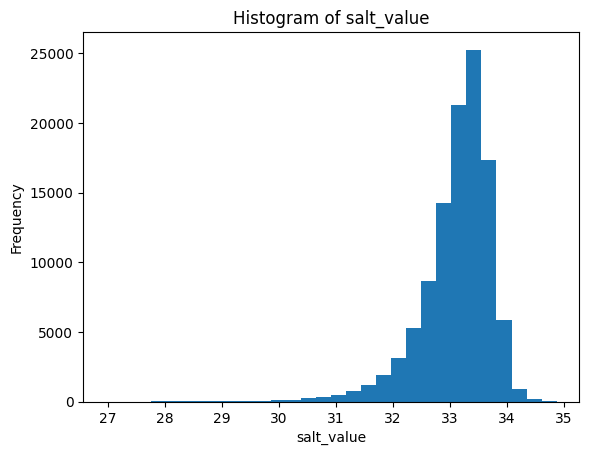

In [12]:
plt.hist(df['salt_value'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('salt_value')
plt.ylabel('Frequency')
plt.title('Histogram of salt_value')
plt.show()

In [13]:
# Perform one-hot encoding for 'c' and 'd' columns
df_encoded = pd.get_dummies(df, columns=['c', 'd'])

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

          a  salt_value  c_14.25  c_14.75  c_15.25  c_15.75  c_16.25  c_16.75  \
0  683019.0   33.828300     True    False    False    False    False    False   
1  683019.0   33.863660     True    False    False    False    False    False   
2  683019.0   33.841366     True    False    False    False    False    False   
3  683019.0   33.854740     True    False    False    False    False    False   
4  683019.0   33.871570     True    False    False    False    False    False   

   c_17.25  c_17.75  d_86.25  d_86.75  d_87.25  d_87.75  d_88.25  d_88.75  \
0    False    False     True    False    False    False    False    False   
1    False    False    False     True    False    False    False    False   
2    False    False    False    False     True    False    False    False   
3    False    False    False    False    False     True    False    False   
4    False    False    False    False    False    False     True    False   

   d_89.25  d_89.75  
0    False    False  
1    F

In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107520 entries, 0 to 107519
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           107520 non-null  float64
 1   salt_value  107520 non-null  float64
 2   c_14.25     107520 non-null  bool   
 3   c_14.75     107520 non-null  bool   
 4   c_15.25     107520 non-null  bool   
 5   c_15.75     107520 non-null  bool   
 6   c_16.25     107520 non-null  bool   
 7   c_16.75     107520 non-null  bool   
 8   c_17.25     107520 non-null  bool   
 9   c_17.75     107520 non-null  bool   
 10  d_86.25     107520 non-null  bool   
 11  d_86.75     107520 non-null  bool   
 12  d_87.25     107520 non-null  bool   
 13  d_87.75     107520 non-null  bool   
 14  d_88.25     107520 non-null  bool   
 15  d_88.75     107520 non-null  bool   
 16  d_89.25     107520 non-null  bool   
 17  d_89.75     107520 non-null  bool   
dtypes: bool(16), float64(2)
memory usage: 3.3 MB

### As the dataset contains 8 unique latitude and longitude values, we will use one hot encoding
### Similarly we need to prepare our test dataset 

In [15]:
df_test = pd.read_csv('./test.csv')

In [16]:
print(df_test.info())
print(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3840 non-null   int64  
 1   c       3840 non-null   float64
 2   d       3840 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 90.1 KB
None
        a      c      d
0  734153  14.25  86.25
1  734153  14.25  86.75
2  734153  14.25  87.25
3  734153  14.25  87.75
4  734153  14.25  88.25


In [17]:
df_encoded_test = pd.get_dummies(df_test, columns=['c', 'd'])

In [18]:
df_encoded_test

a  c_14.25  c_14.75  c_15.25  c_15.75  c_16.25  c_16.75  c_17.25  \
0     734153     True    False    False    False    False    False    False   
1     734153     True    False    False    False    False    False    False   
2     734153     True    False    False    False    False    False    False   
3     734153     True    False    False    False    False    False    False   
4     734153     True    False    False    False    False    False    False   
...      ...      ...      ...      ...      ...      ...      ...      ...   
3835  735948    False    False    False    False    False    False    False   
3836  735948    False    False    False    False    False    False    False   
3837  735948    False    False    False    False    False    False    False   
3838  735948    False    False    False    False    False    False    False   
3839  735948    False    False    False    False    False    False    False   

      c_17.75  d_86.25  d_86.75  d_87.25  d_87.75  d_88.25  d_88.75  d_89.25  \
0       False     True    False    False    False    False    False    False   
1       False    False     True    False    False    False    False    False   
2       False    False    False     True    False    False    False    False   
3       False    False    False    False     True    False    False    False   
4       False    False    False    False    False     True    False    False   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3835     True    False    False    False     True    False    False    False   
3836     True    False    False    False    False     True    False    False   
3837     True    False    False    False    False    False     True    False   
3838     True    False    False    False    False    False    False     True   
3839     True    False    False    False    False    False    False    False   

      d_89.75  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
3835    False  
3836    False  
3837    False  
3838    False  
3839     True  

[3840 rows x 17 columns]

## Linear Regression
### Now as the preprocessing of the data is done, so will apply linear regression

In [19]:
X = df_encoded.drop('salt_value', axis=1)  # Features
y = df_encoded['salt_value']  # Target variable

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model_linear.predict(X_test)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

def evaluate_regression(y_pred, y_test):
    # R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Display the metrics
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Explained Variance Score: {evs}")

# Usage
evaluate_regression(y_pred, y_test)

R-squared (R2): 0.06387654426777023
Mean Absolute Error (MAE): 0.43620534138062894
Mean Squared Error (MSE): 0.3555618221262403
Root Mean Squared Error (RMSE): 0.596290048656055
Explained Variance Score: 0.06388460943693453


### Prediciting on the test dataset

In [24]:
y_pred_test = model_linear.predict(df_encoded_test)

In [25]:
y_pred_test

array([33.43646776, 33.47900807, 33.49649755, ..., 33.03949126,
       32.97638248, 32.89611721])

In [26]:
# Calculate the number of data points in each part
part_size = len(y_pred_test) // 5

# Initialize a list to store the averages of each part
part_averages = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(5):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size
    part = y_pred_test[start_idx:end_idx]
    average = np.mean(part)
    part_averages.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages):
    print(f"Year {2011 + i} Average: {average}")

Year 2011 Average: 33.257310971339486
Year 2012 Average: 33.259175360149456
Year 2013 Average: 33.261036351439955
Year 2014 Average: 33.26289649335059
Year 2015 Average: 33.26475663526122


### Now plotting averages of every year

In [40]:
part_size_train = len(y) // 140

# Initialize a list to store the averages of each part
part_averages_train = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(140):
    start_idx = i * part_size_train
    end_idx = (i + 1) * part_size_train
    part = y[start_idx:end_idx]
    average = np.mean(part)
    part_averages_train.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages_train):
    print(f"Year {1871 + i} Average: {average}")

Year 1871 Average: 32.940725492187504
Year 1872 Average: 32.99242012760416
Year 1873 Average: 32.96020888802083
Year 1874 Average: 32.985156391927084
Year 1875 Average: 33.22869313671875
Year 1876 Average: 33.085380739583336
Year 1877 Average: 32.92071334765625
Year 1878 Average: 32.8669317890625
Year 1879 Average: 32.64798631380208
Year 1880 Average: 32.957967401041664
Year 1881 Average: 32.96335080859375
Year 1882 Average: 32.729441040364584
Year 1883 Average: 32.95909354166667
Year 1884 Average: 32.97894939192708
Year 1885 Average: 33.337286845052084
Year 1886 Average: 33.125861173177086
Year 1887 Average: 33.186050218750005
Year 1888 Average: 32.99771123307292
Year 1889 Average: 33.298090139322916
Year 1890 Average: 33.3533296640625
Year 1891 Average: 32.95134920703125
Year 1892 Average: 33.32672792317708
Year 1893 Average: 32.9486184765625
Year 1894 Average: 33.111448348958334
Year 1895 Average: 32.924421178385415
Year 1896 Average: 33.066992386718745
Year 1897 Average: 33.2296661

### Here part_averages_train contains average of each year from 1871 to 2010 and part_avergaes contains averages from 2011 to 2015 (predicted)

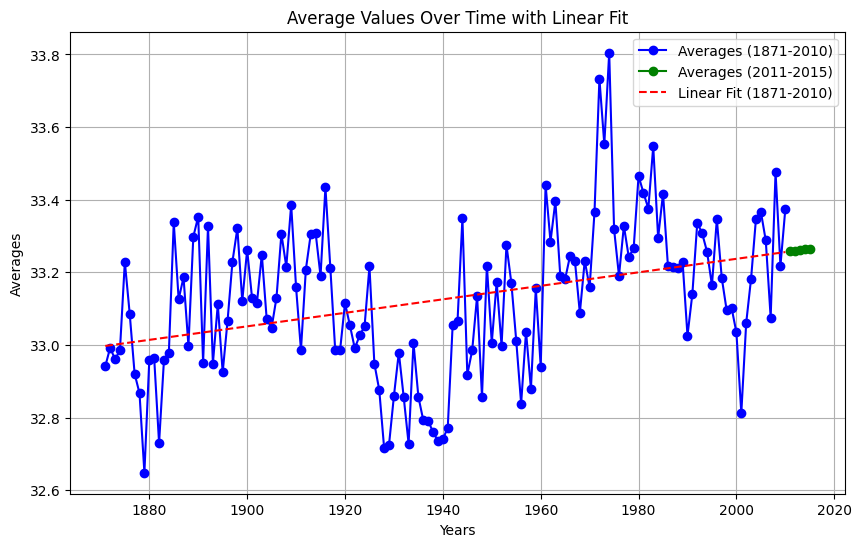

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the line graph for both parts
plt.figure(figsize=(10, 6))
plt.plot(years_train, part_averages_train, label='Averages (1871-2010)', marker='o', linestyle='-', color='blue')
plt.plot(years_test, part_averages, label='Averages (2011-2015)', marker='o', linestyle='-', color='green')

# Perform linear regression on the 'years_train' and 'part_averages_train' data
linear_fit = np.polyfit(years_train, part_averages_train, 1)
linear_fit_fn = np.poly1d(linear_fit)

# Plot the linear regression line
plt.plot(years_train, linear_fit_fn(years_train), color='red', linestyle='--', label='Linear Fit (1871-2010)')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Averages')
plt.title('Average Values Over Time with Linear Fit')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Polynomial Regression (Deg 2) - 171 Features

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

# Create a PolynomialFeatures transformer to generate polynomial features
degree = 2  # You can change the degree as needed
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train a linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = model_poly.predict(X_test_poly)

# Define a function to evaluate the regression model
def evaluate_regression(y_pred, y_test):
    # R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Display the metrics
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Explained Variance Score: {evs}")

# Usage
evaluate_regression(y_pred_poly, y_test)

R-squared (R2): 0.07301426643747766
Mean Absolute Error (MAE): 0.43402972755949726
Mean Squared Error (MSE): 0.3520910991945057
Root Mean Squared Error (RMSE): 0.5933726478314497
Explained Variance Score: 0.07302439560907636


In [30]:
y_pred_test = model_poly.predict(poly.transform(df_encoded_test))

In [31]:
# Calculate the number of data points in each part
part_size = len(y_pred_test) // 5

# Initialize a list to store the averages of each part
part_averages = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(5):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size
    part = y_pred_test[start_idx:end_idx]
    average = np.mean(part)
    part_averages.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages):
    print(f"Year {2011 + i} Average: {average}")

Year 2011 Average: 33.320831336451675
Year 2012 Average: 33.32540294466849
Year 2013 Average: 33.33000428002589
Year 2014 Average: 33.33464153473188
Year 2015 Average: 33.339316792708


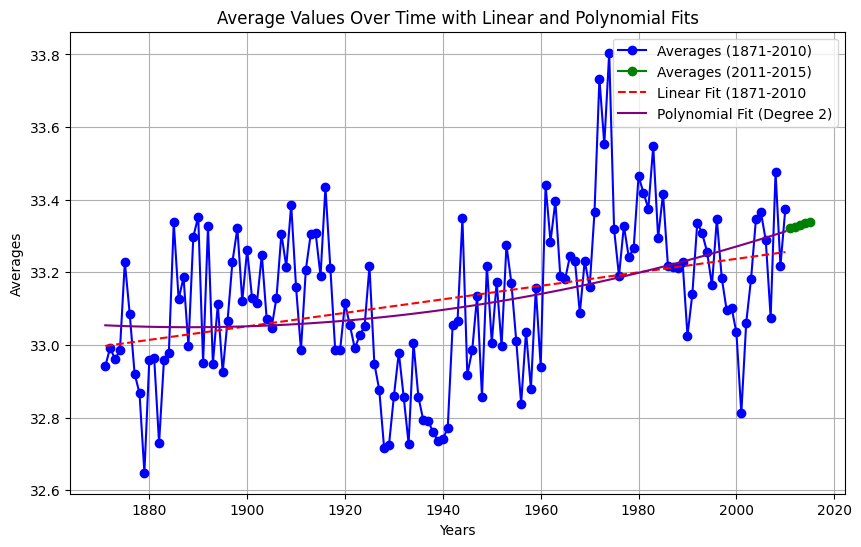

In [32]:
# Plot the line graph for both parts
plt.figure(figsize=(10, 6))
plt.plot(years_train, part_averages_train, label='Averages (1871-2010)', marker='o', linestyle='-', color='blue')
plt.plot(years_test, part_averages, label='Averages (2011-2015)', marker='o', linestyle='-', color='green')

# Perform linear regression on the 'years_train' and 'part_averages_train' data
linear_fit = np.polyfit(years_train, part_averages_train, 1)
linear_fit_fn = np.poly1d(linear_fit)

# Plot the linear regression line
plt.plot(years_train, linear_fit_fn(years_train), color='red', linestyle='--', label='Linear Fit (1871-2010')

# Perform polynomial regression on the 'years_train' and 'part_averages_train' data
degree = 2  # You can change the degree as needed
poly_fit = np.polyfit(years_train, part_averages_train, degree)
poly_fit_fn = np.poly1d(poly_fit)

# Plot the polynomial curve
years_smooth = np.linspace(min(years_train), max(years_train), 100)  # Smooth curve for better visualization
plt.plot(years_smooth, poly_fit_fn(years_smooth), color='purple', linestyle='-', label=f'Polynomial Fit (Degree {degree})')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Averages')
plt.title('Average Values Over Time with Linear and Polynomial Fits')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create and train a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Define a function to evaluate the regression model
def evaluate_regression(y_pred, y_test):
    # R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Display the metrics
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Explained Variance Score: {evs}")

# Usage
evaluate_regression(y_pred_rf, y_test)

y_pred_rf_test = rf_model.predict(df_encoded_test)

# Calculate the number of data points in each part
part_size = len(y_pred_rf_test) // 5

# Initialize a list to store the averages of each part
part_averages = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(5):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size
    part = y_pred_rf_test[start_idx:end_idx]
    average = np.mean(part)
    part_averages.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages):
    print(f"Year {2011 + i} Average: {average}")

R-squared (R2): 0.7775051692807732
Mean Absolute Error (MAE): 0.1766630448693267
Mean Squared Error (MSE): 0.0845087973597647
Root Mean Squared Error (RMSE): 0.29070396859995684
Explained Variance Score: 0.7775342073924416
Year 2011 Average: 33.135144948593755
Year 2012 Average: 33.135144948593755
Year 2013 Average: 33.135144948593755
Year 2014 Average: 33.135144948593755
Year 2015 Average: 33.135144948593755


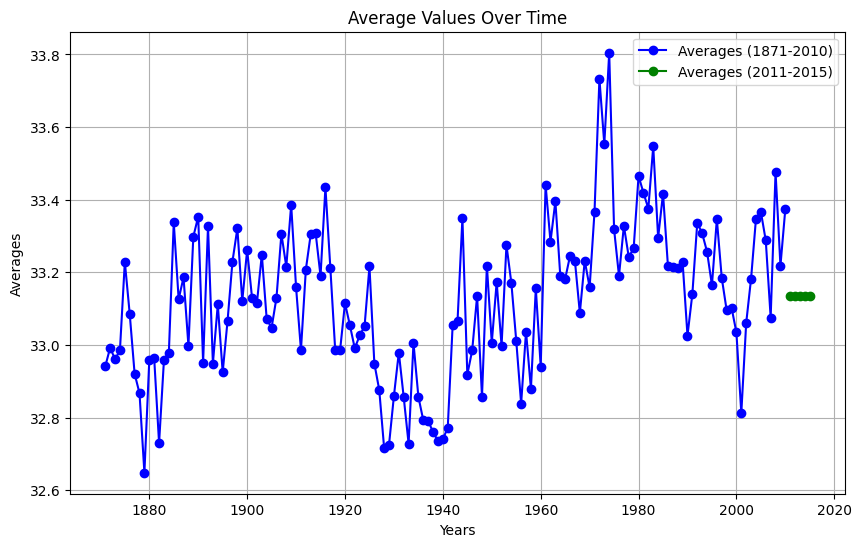

In [34]:
import matplotlib.pyplot as plt

# Assuming you have 'part_averages_train' and 'part_averages' as lists of average values
# from 1871 to 2010 and from 2011 to 2015 respectively

# Years for each part
years_train = list(range(1871, 2011))
years_test = list(range(2011, 2016))

# Plot the line graph for both parts
plt.figure(figsize=(10, 6))
plt.plot(years_train, part_averages_train, label='Averages (1871-2010)', marker='o', linestyle='-', color='blue')
plt.plot(years_test, part_averages, label='Averages (2011-2015)', marker='o', linestyle='-', color='green')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Averages')
plt.title('Average Values Over Time')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## As we can see that, data has lot of noise maybe taking the average of 64 coordinates every year is not a good approach, as it may have no relavant relations, and our models are failing to predict

## But we can see the curves of salt for each coordinates, to visualise the salt level properly, firstly we will separate the training data in 64 parts corresponding to each coordinates

In [35]:
import pandas as pd
import os

# Create a directory to store the subsets
if not os.path.exists("subset"):
    os.makedirs("subset")

unique_c_values = df['c'].unique()
unique_d_values = df['d'].unique()

for c_value in unique_c_values:
    for d_value in unique_d_values:
        # Filter the dataset for the current combination of c and d values
        subset = df[(df['c'] == c_value) & (df['d'] == d_value)]
        
        # Save each subset to a separate file in the 'subset' directory
        subset.to_csv(f"subset/subset_c{c_value}_d{d_value}.csv", index=False)


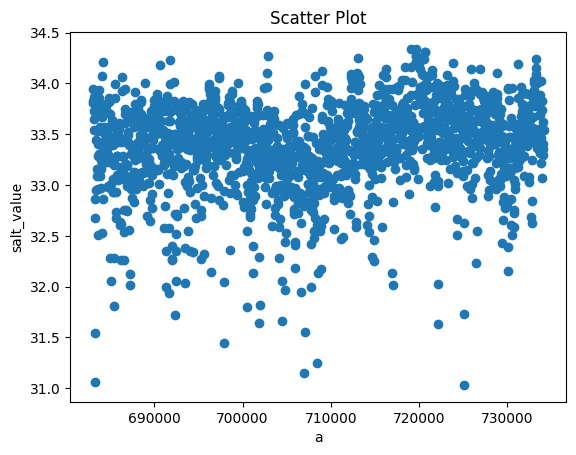

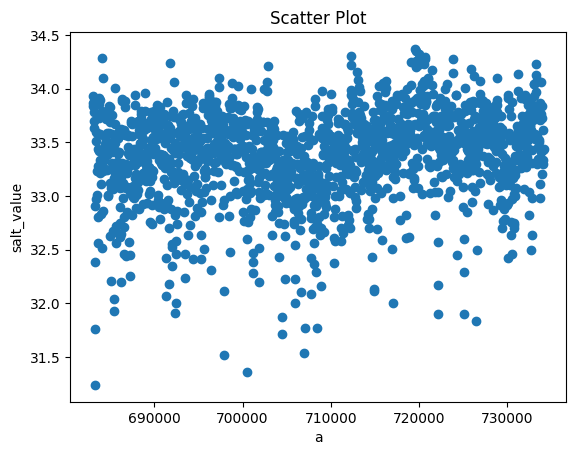

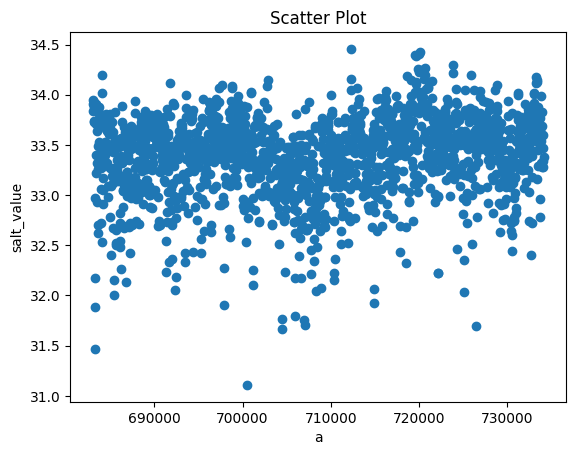

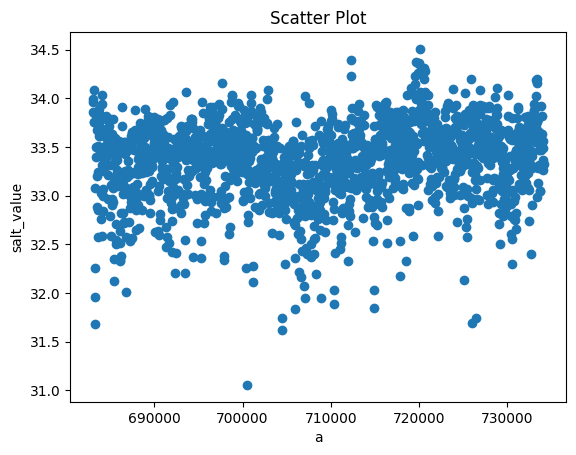

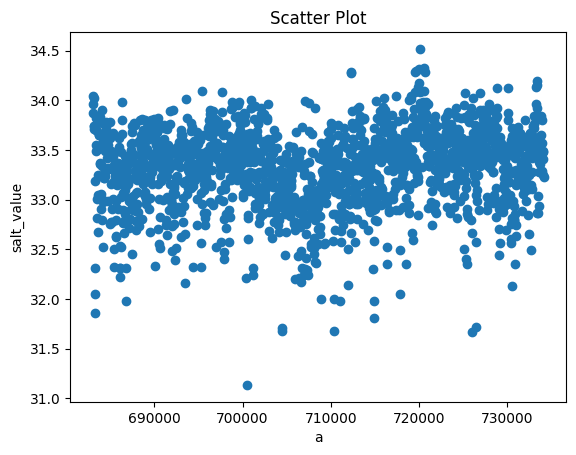

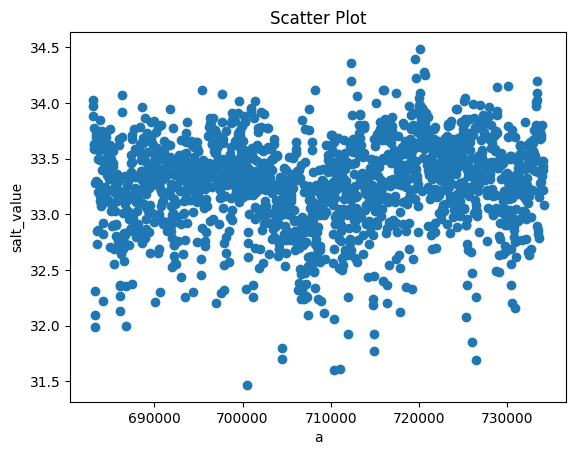

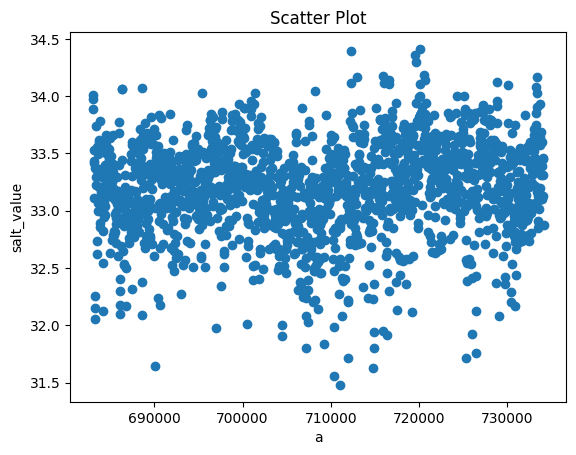

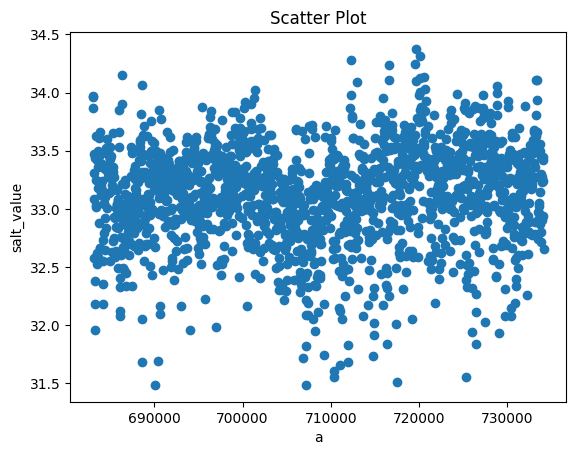

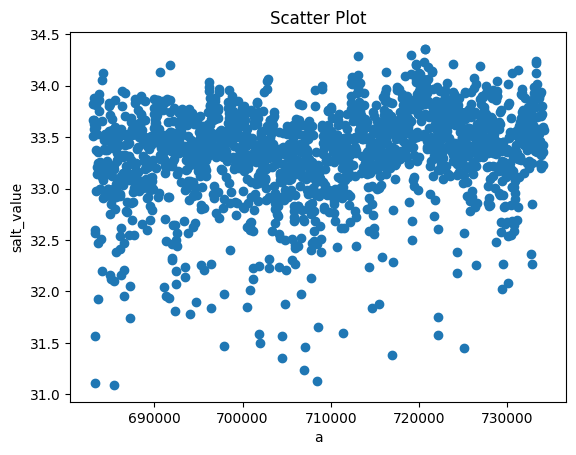

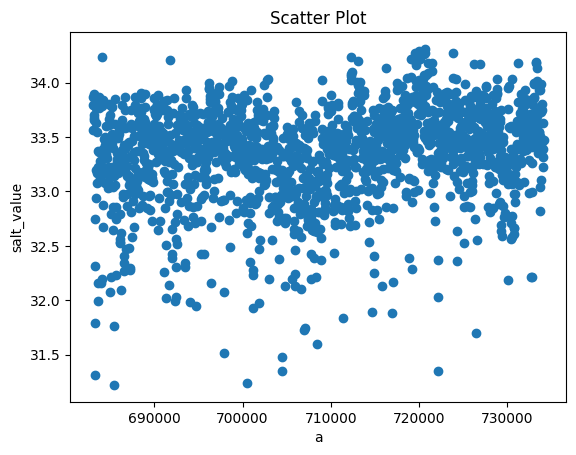

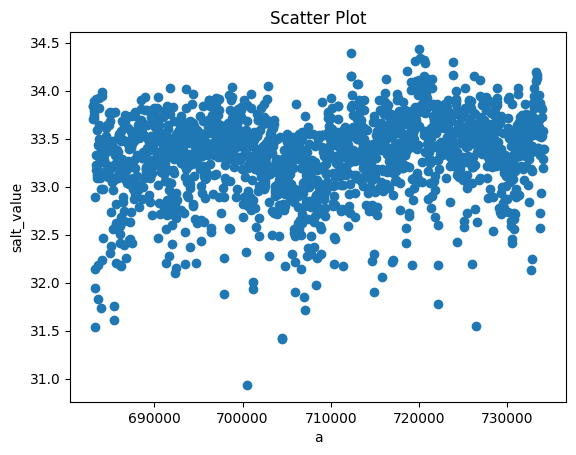

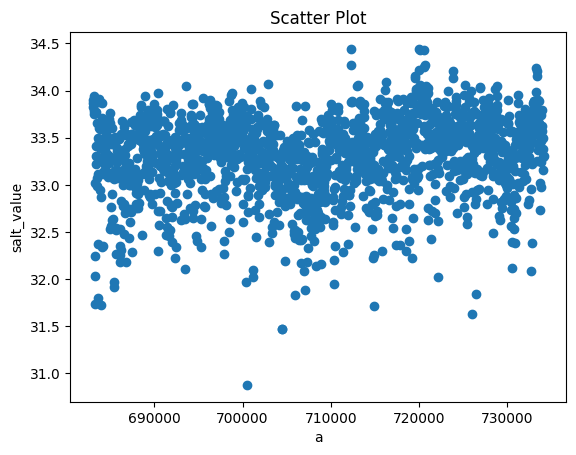

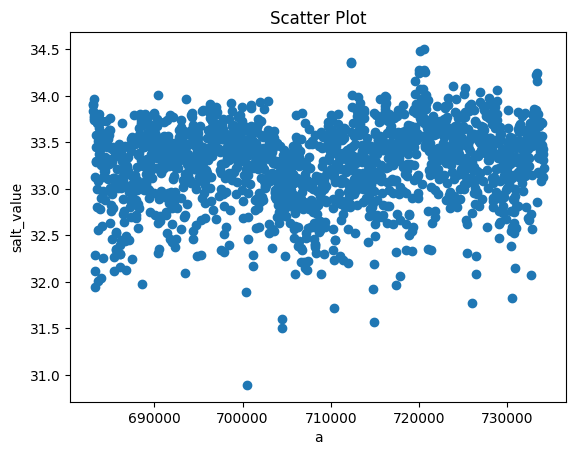

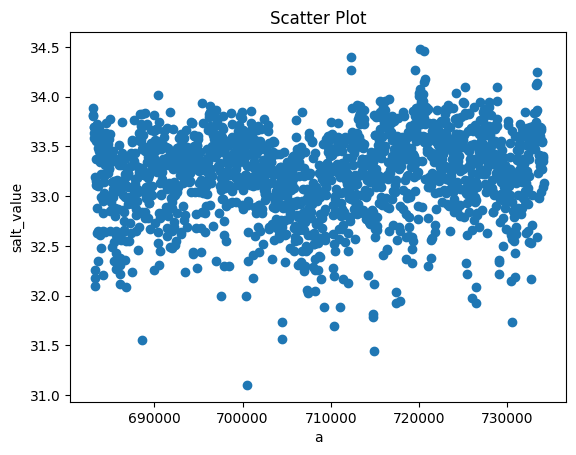

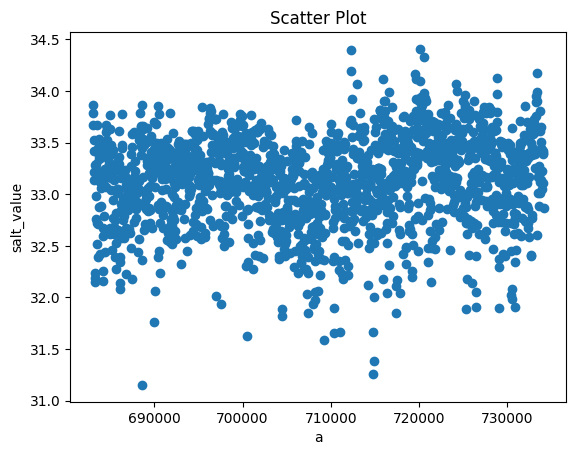

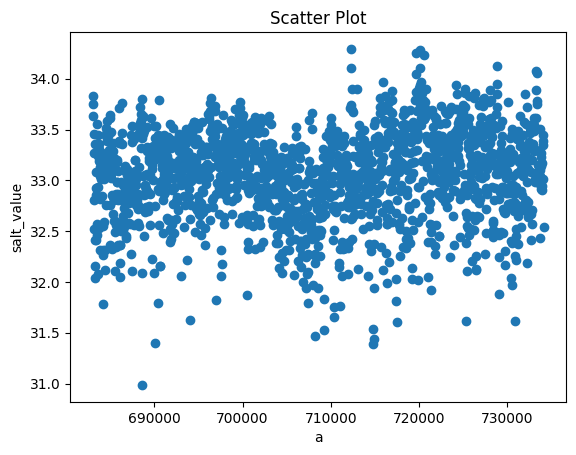

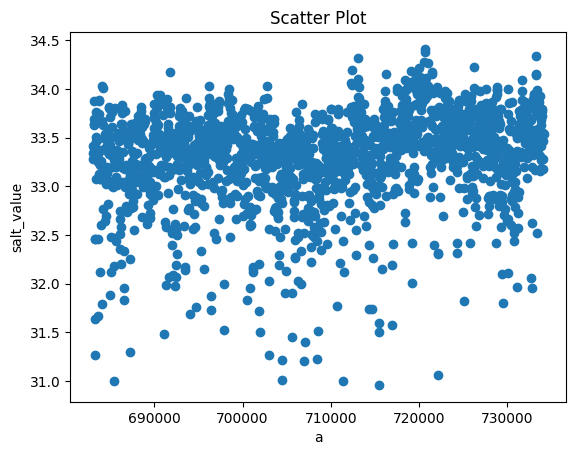

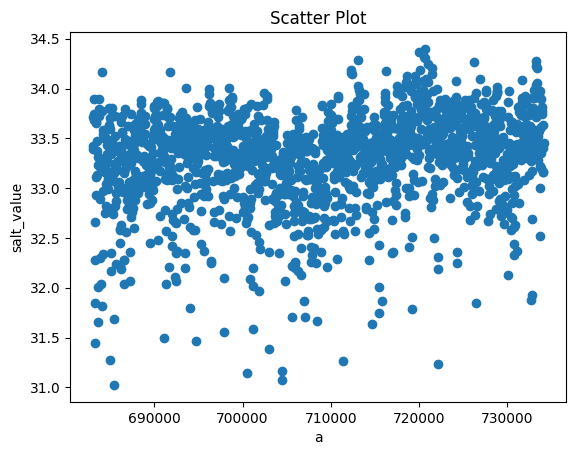

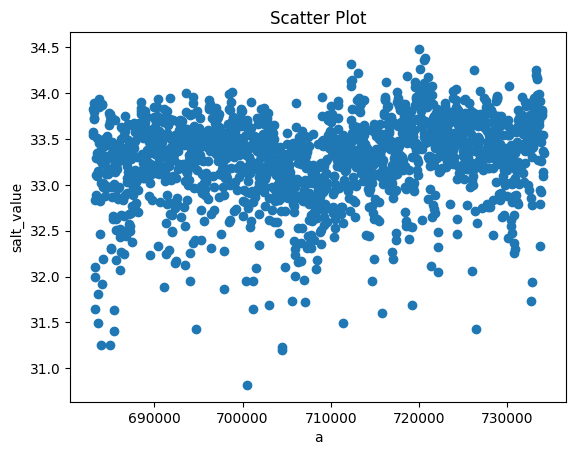

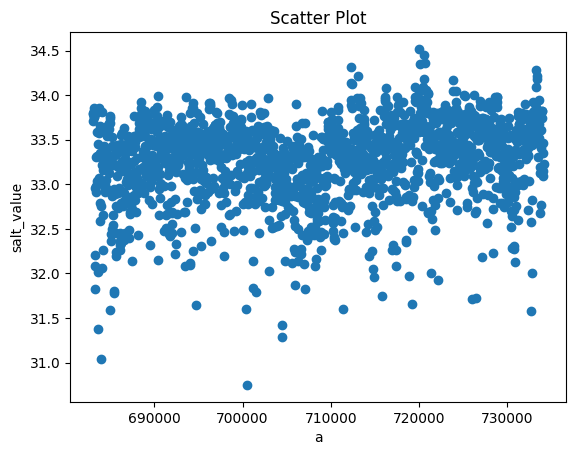

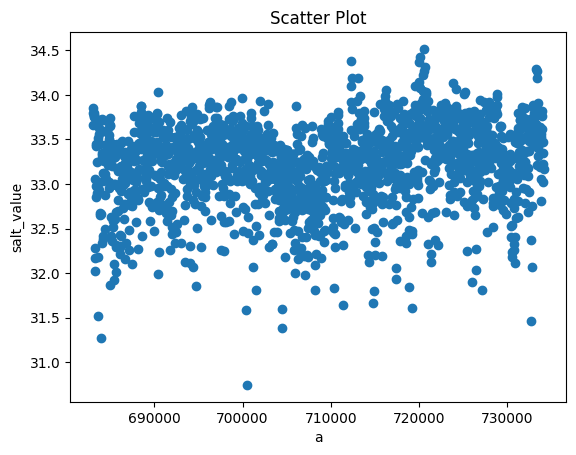

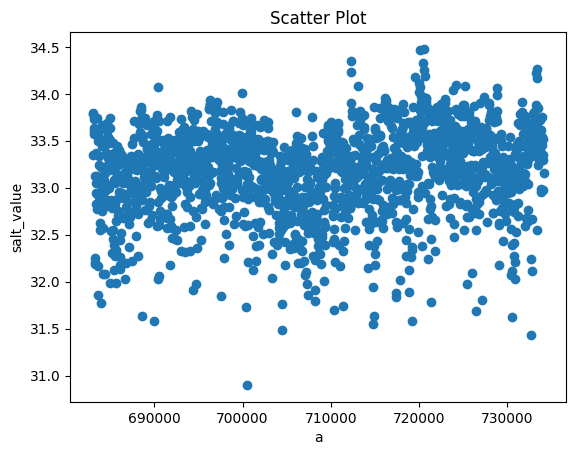

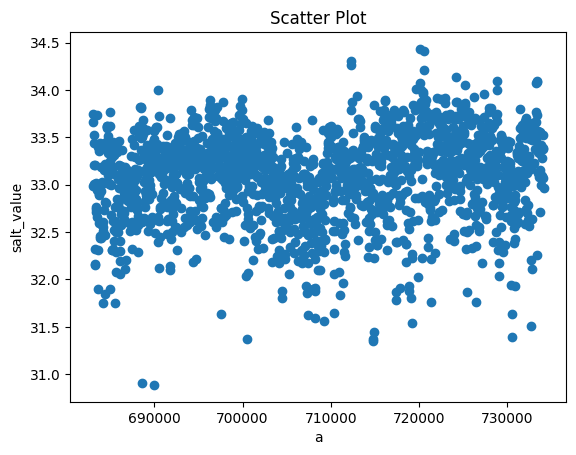

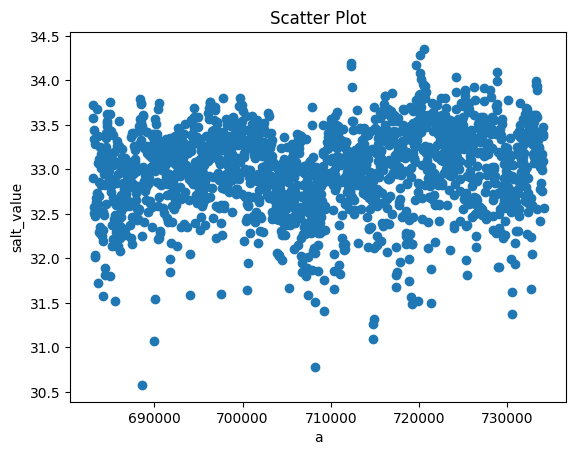

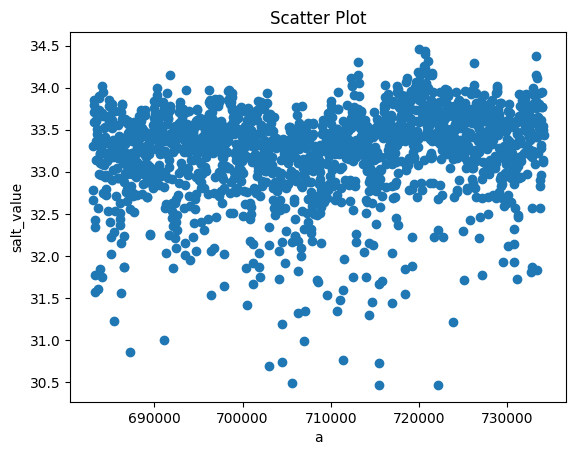

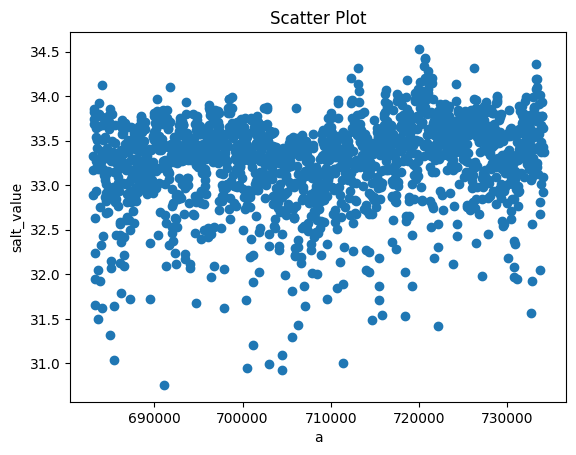

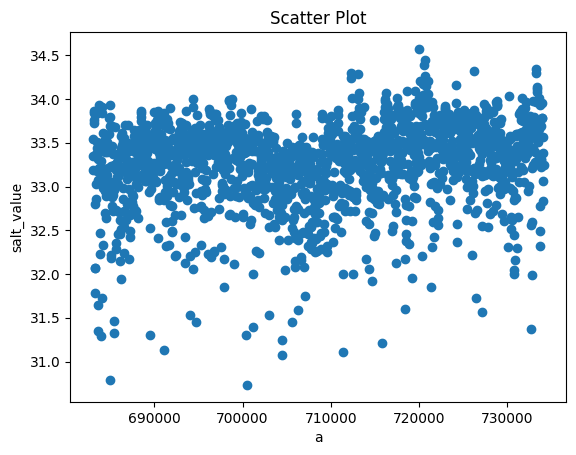

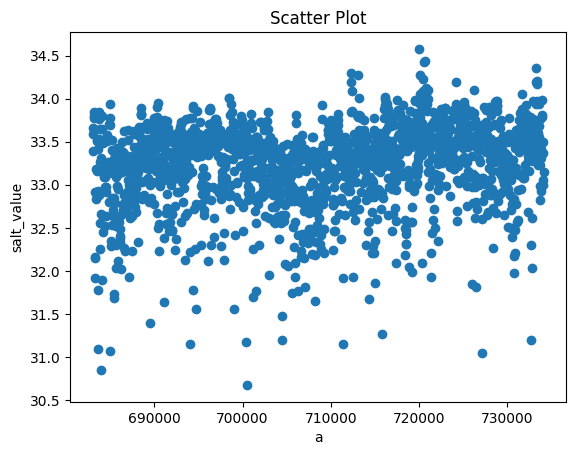

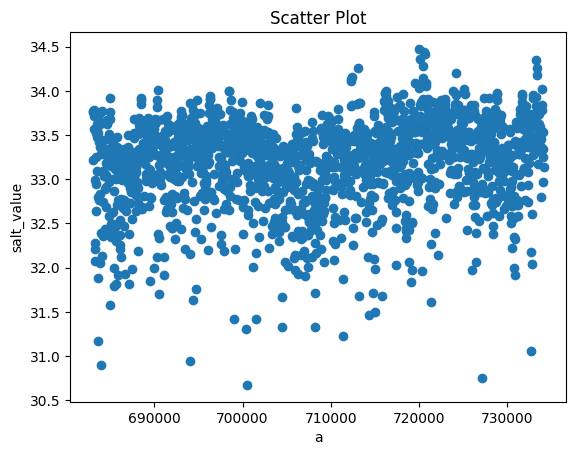

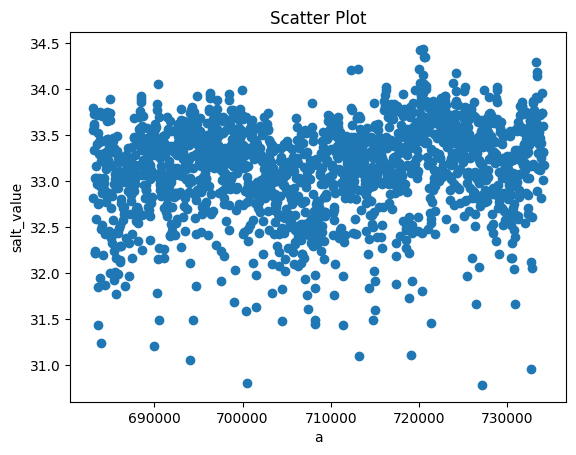

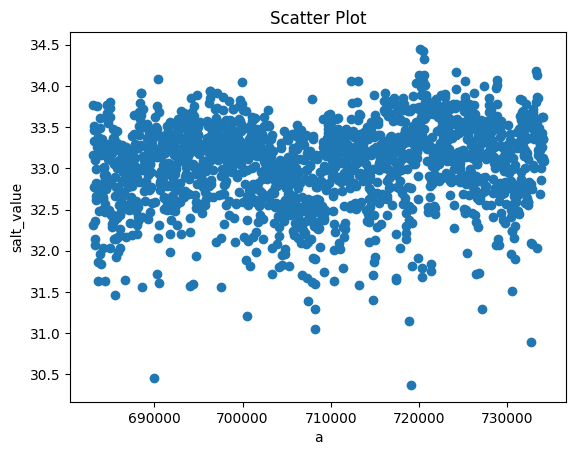

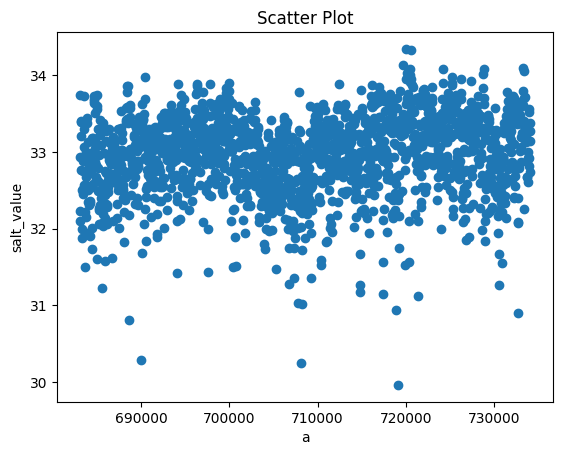

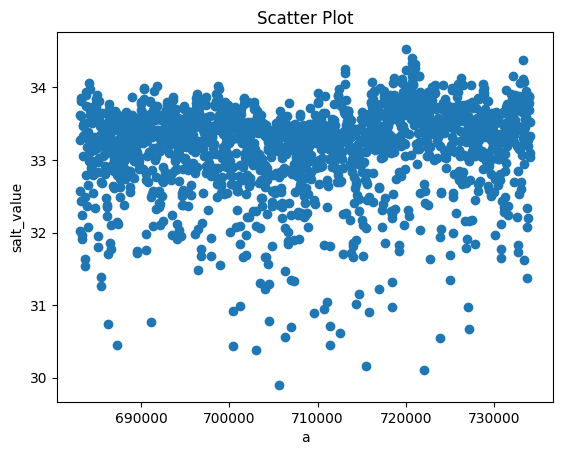

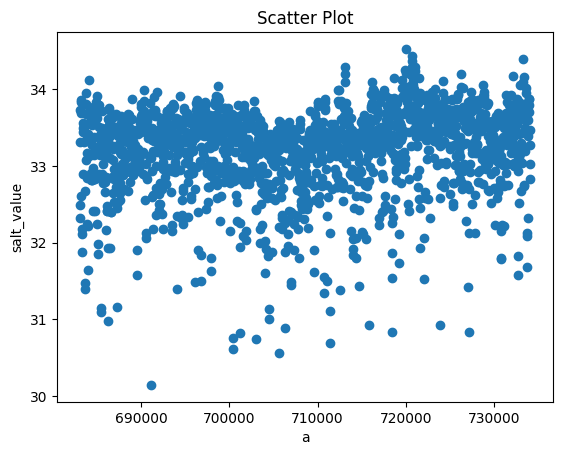

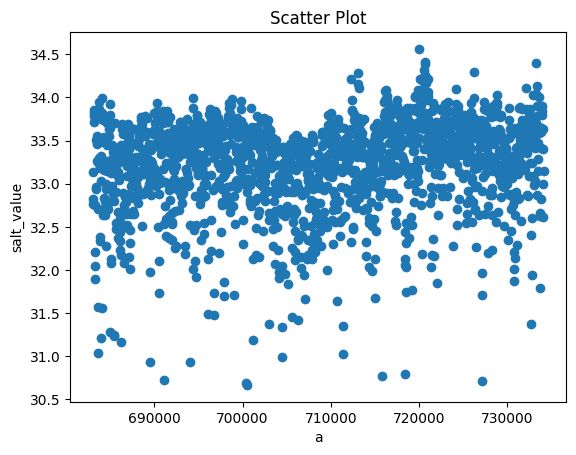

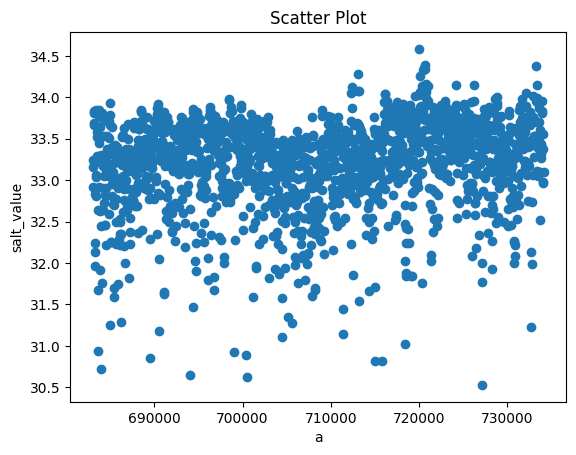

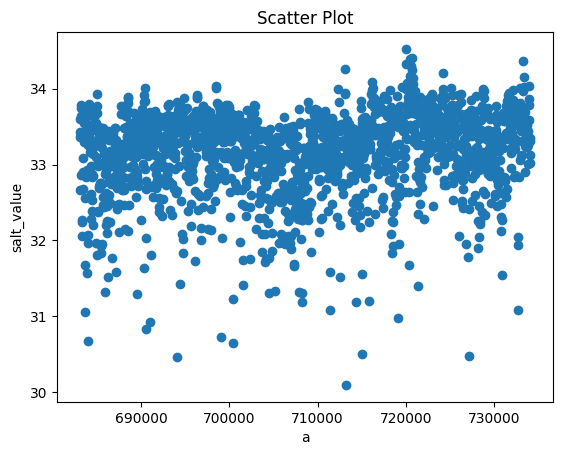

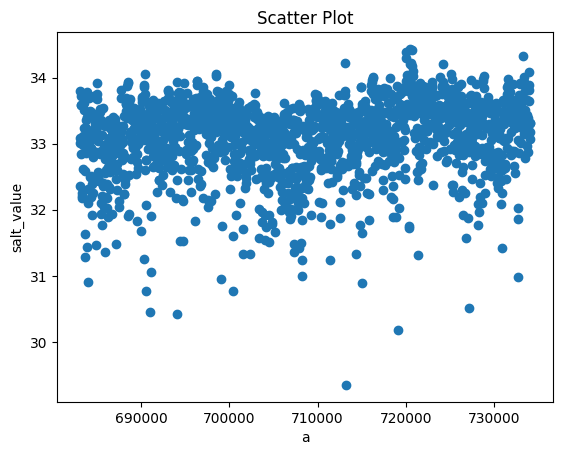

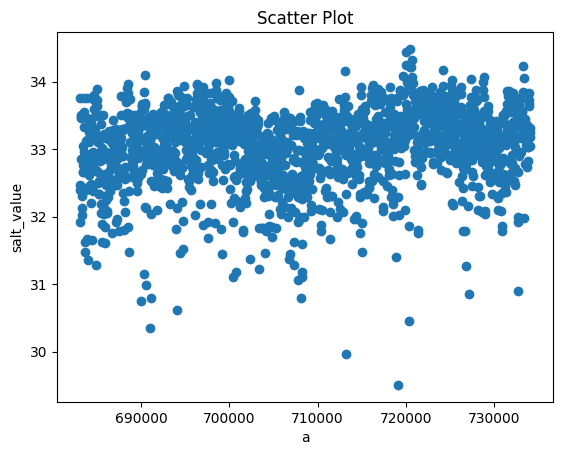

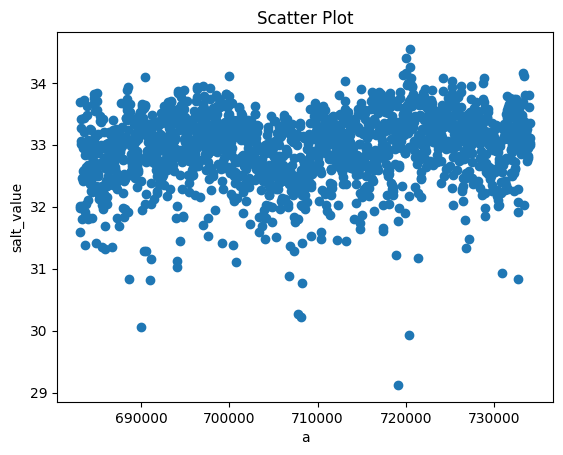

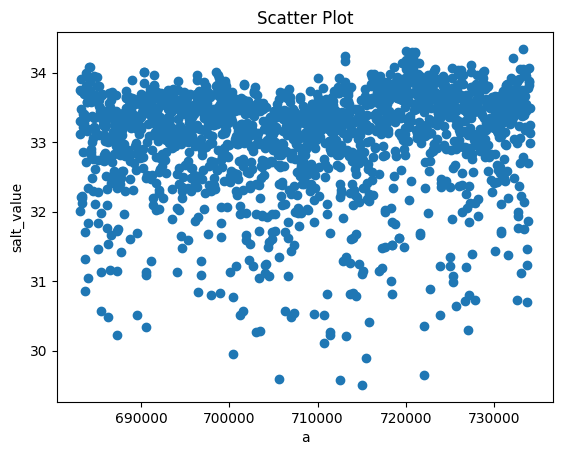

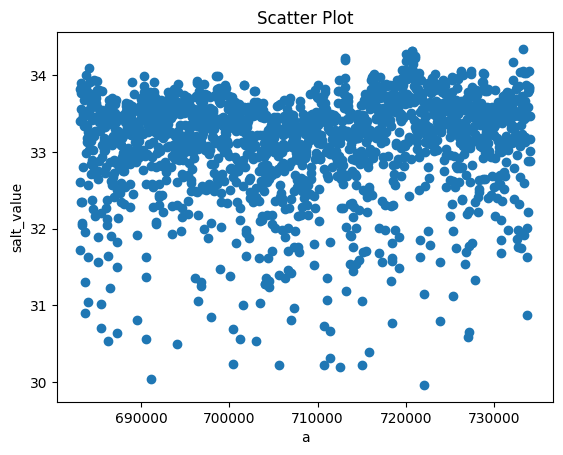

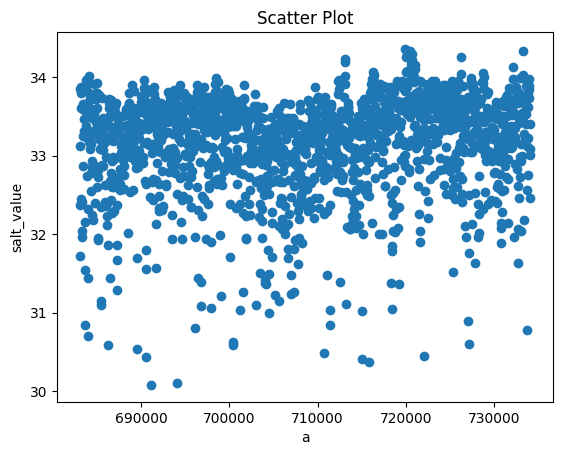

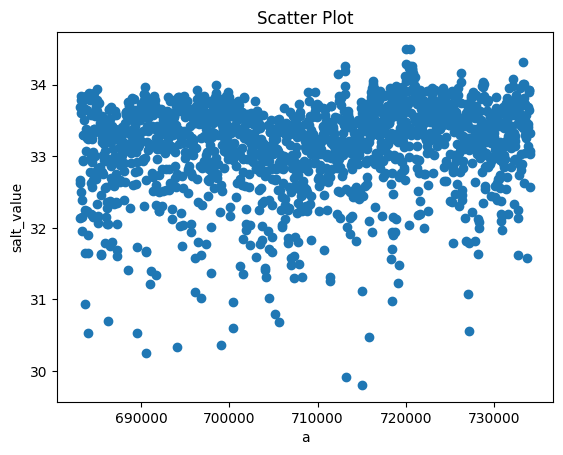

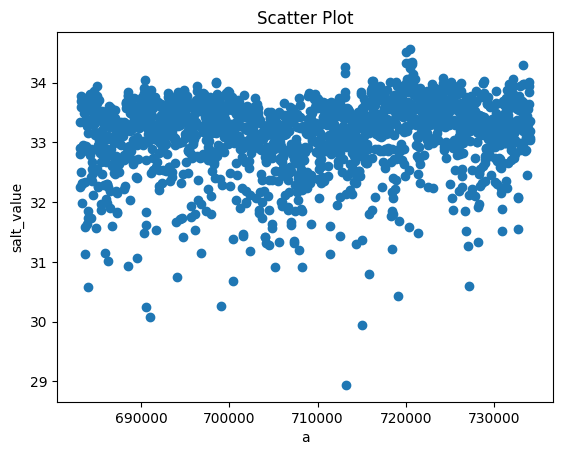

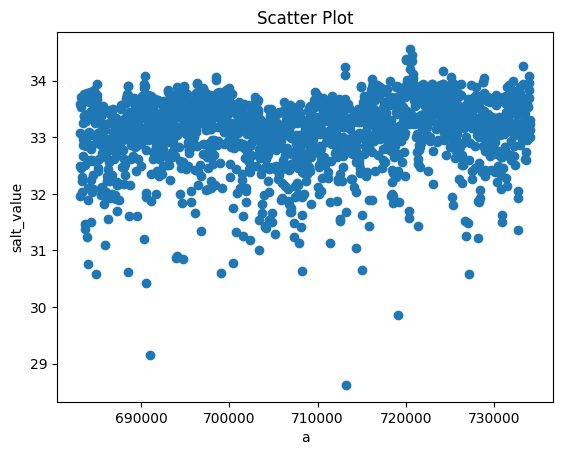

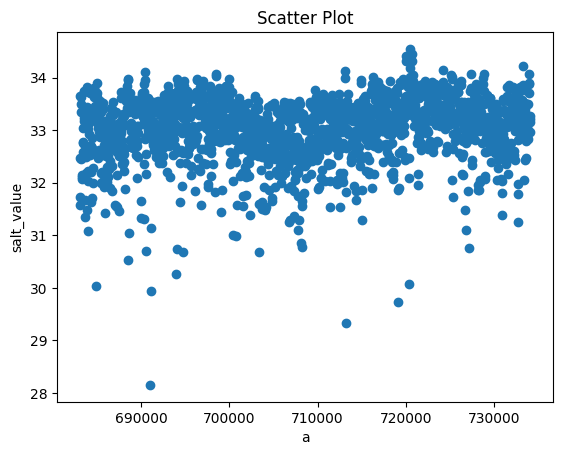

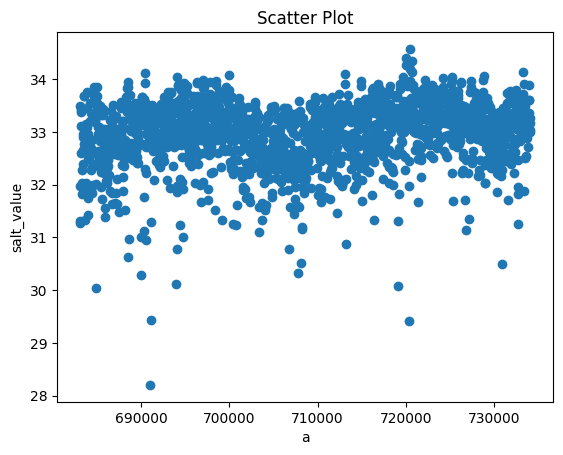

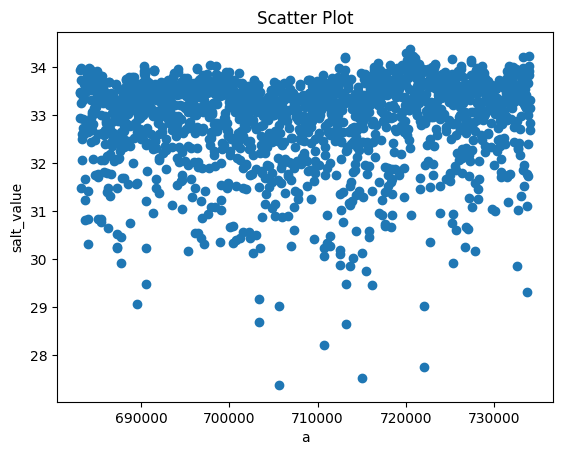

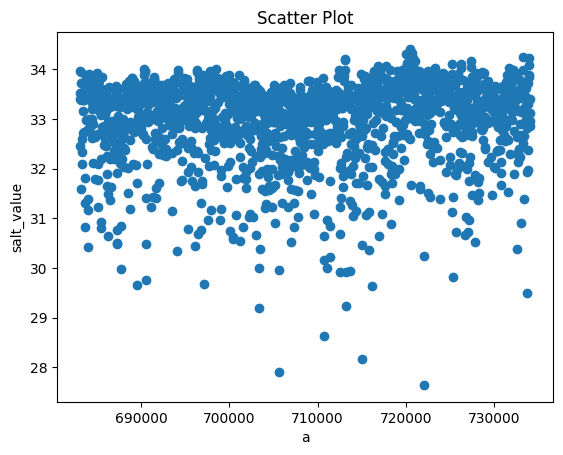

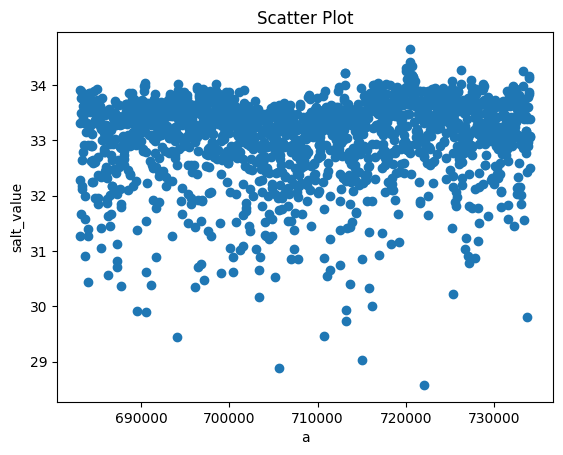

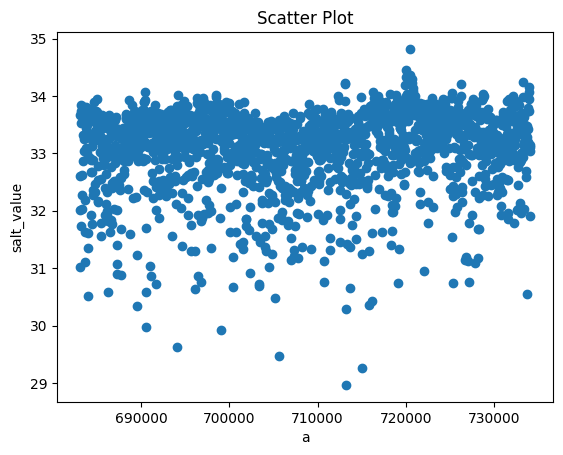

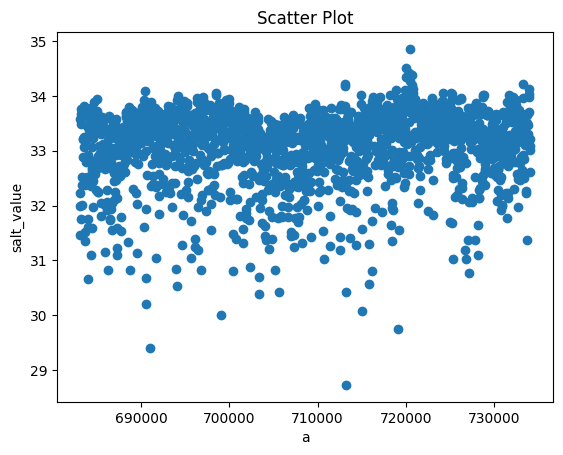

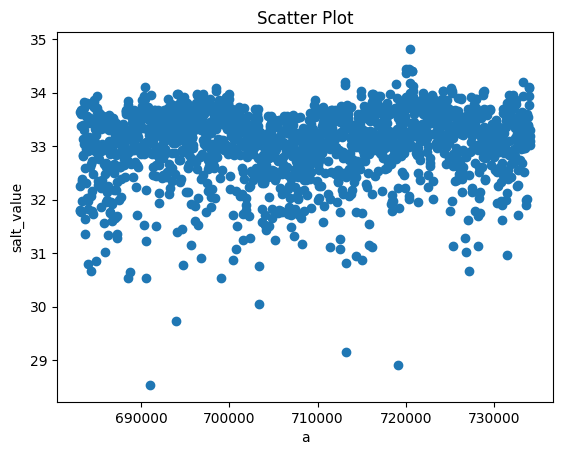

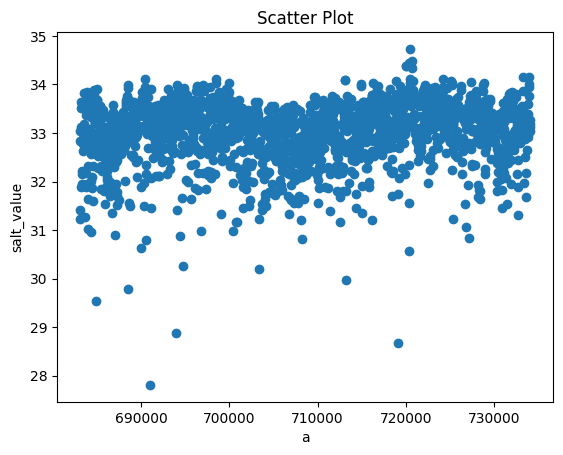

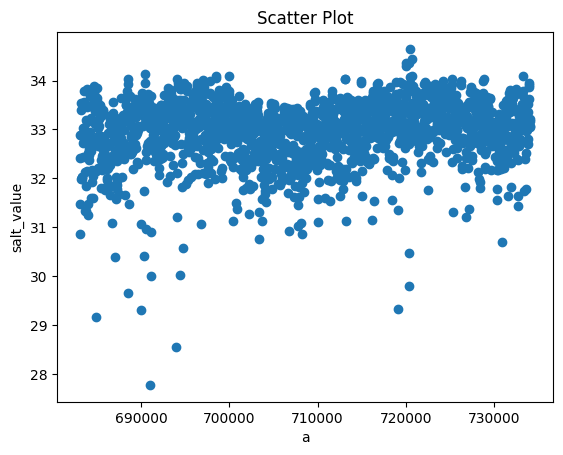

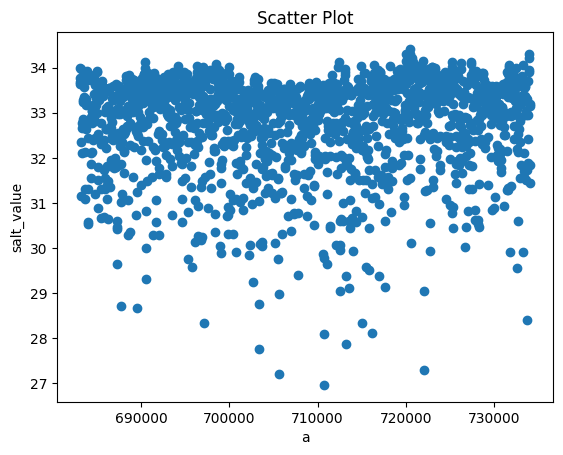

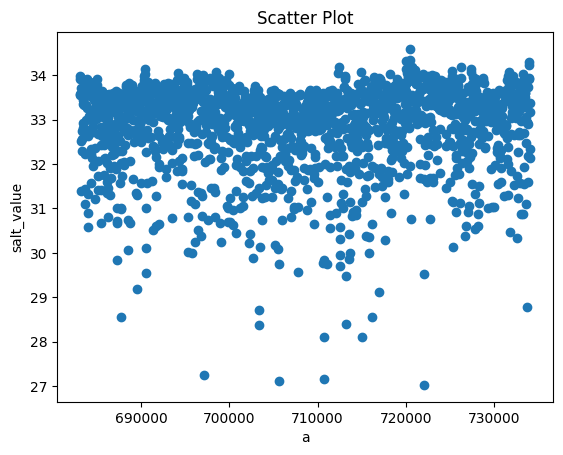

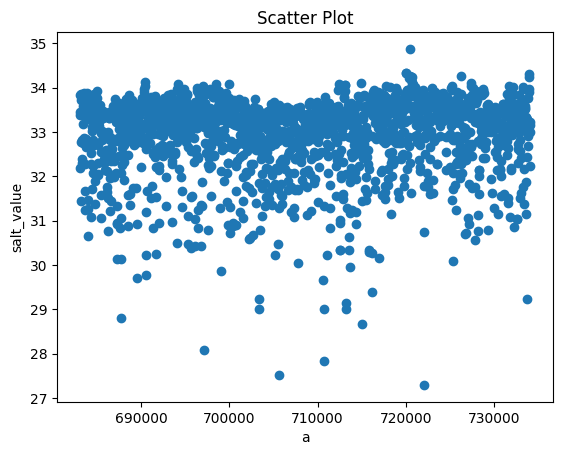

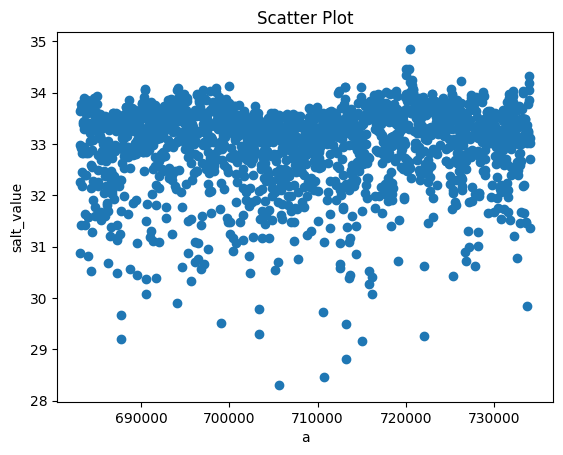

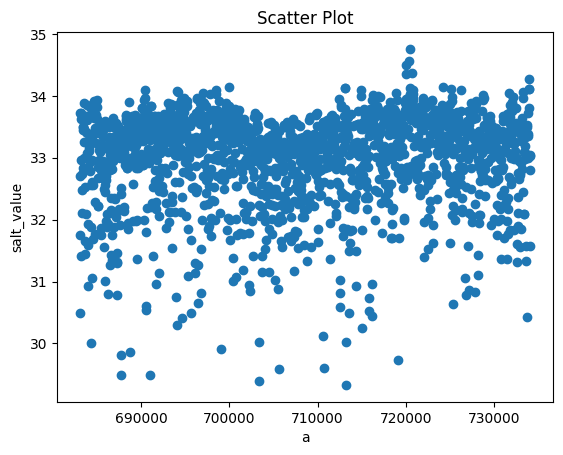

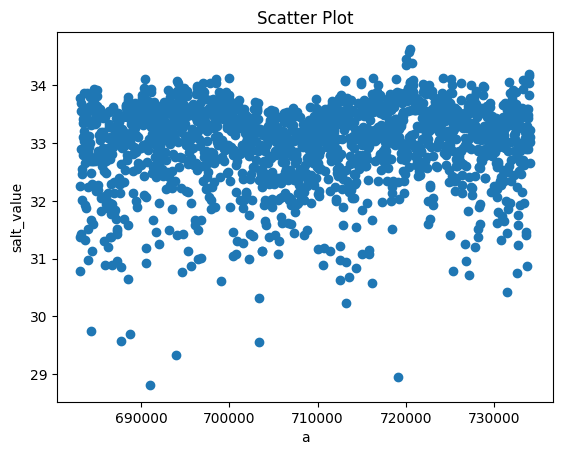

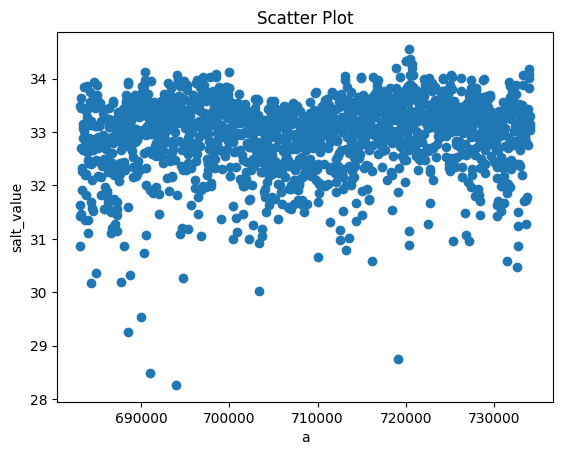

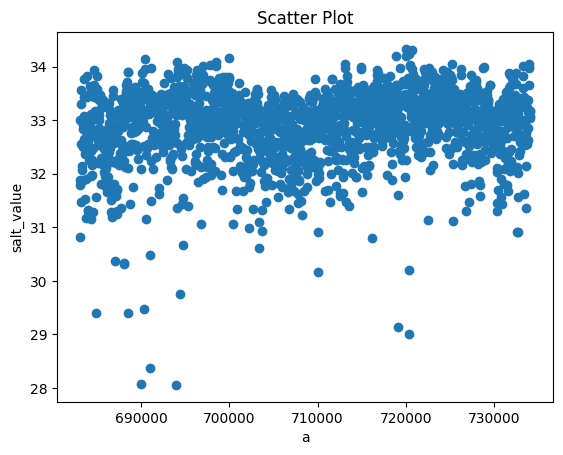

In [36]:
# Create a function to visualize each subset
def visualize_subset(subset):
    # Create a scatter plot of column 'a' against 'salt_value'
    plt.scatter(subset['a'], subset['salt_value'])
    plt.xlabel('a')
    plt.ylabel('salt_value')
    plt.title('Scatter Plot')
    plt.show()

for c_value in unique_c_values:
    for d_value in unique_d_values:
        # Load the subset from the CSV file
        subset = pd.read_csv(f"subset/subset_c{c_value}_d{d_value}.csv")
        visualize_subset(subset)

## Taking average of each year and plotting for each coordinates

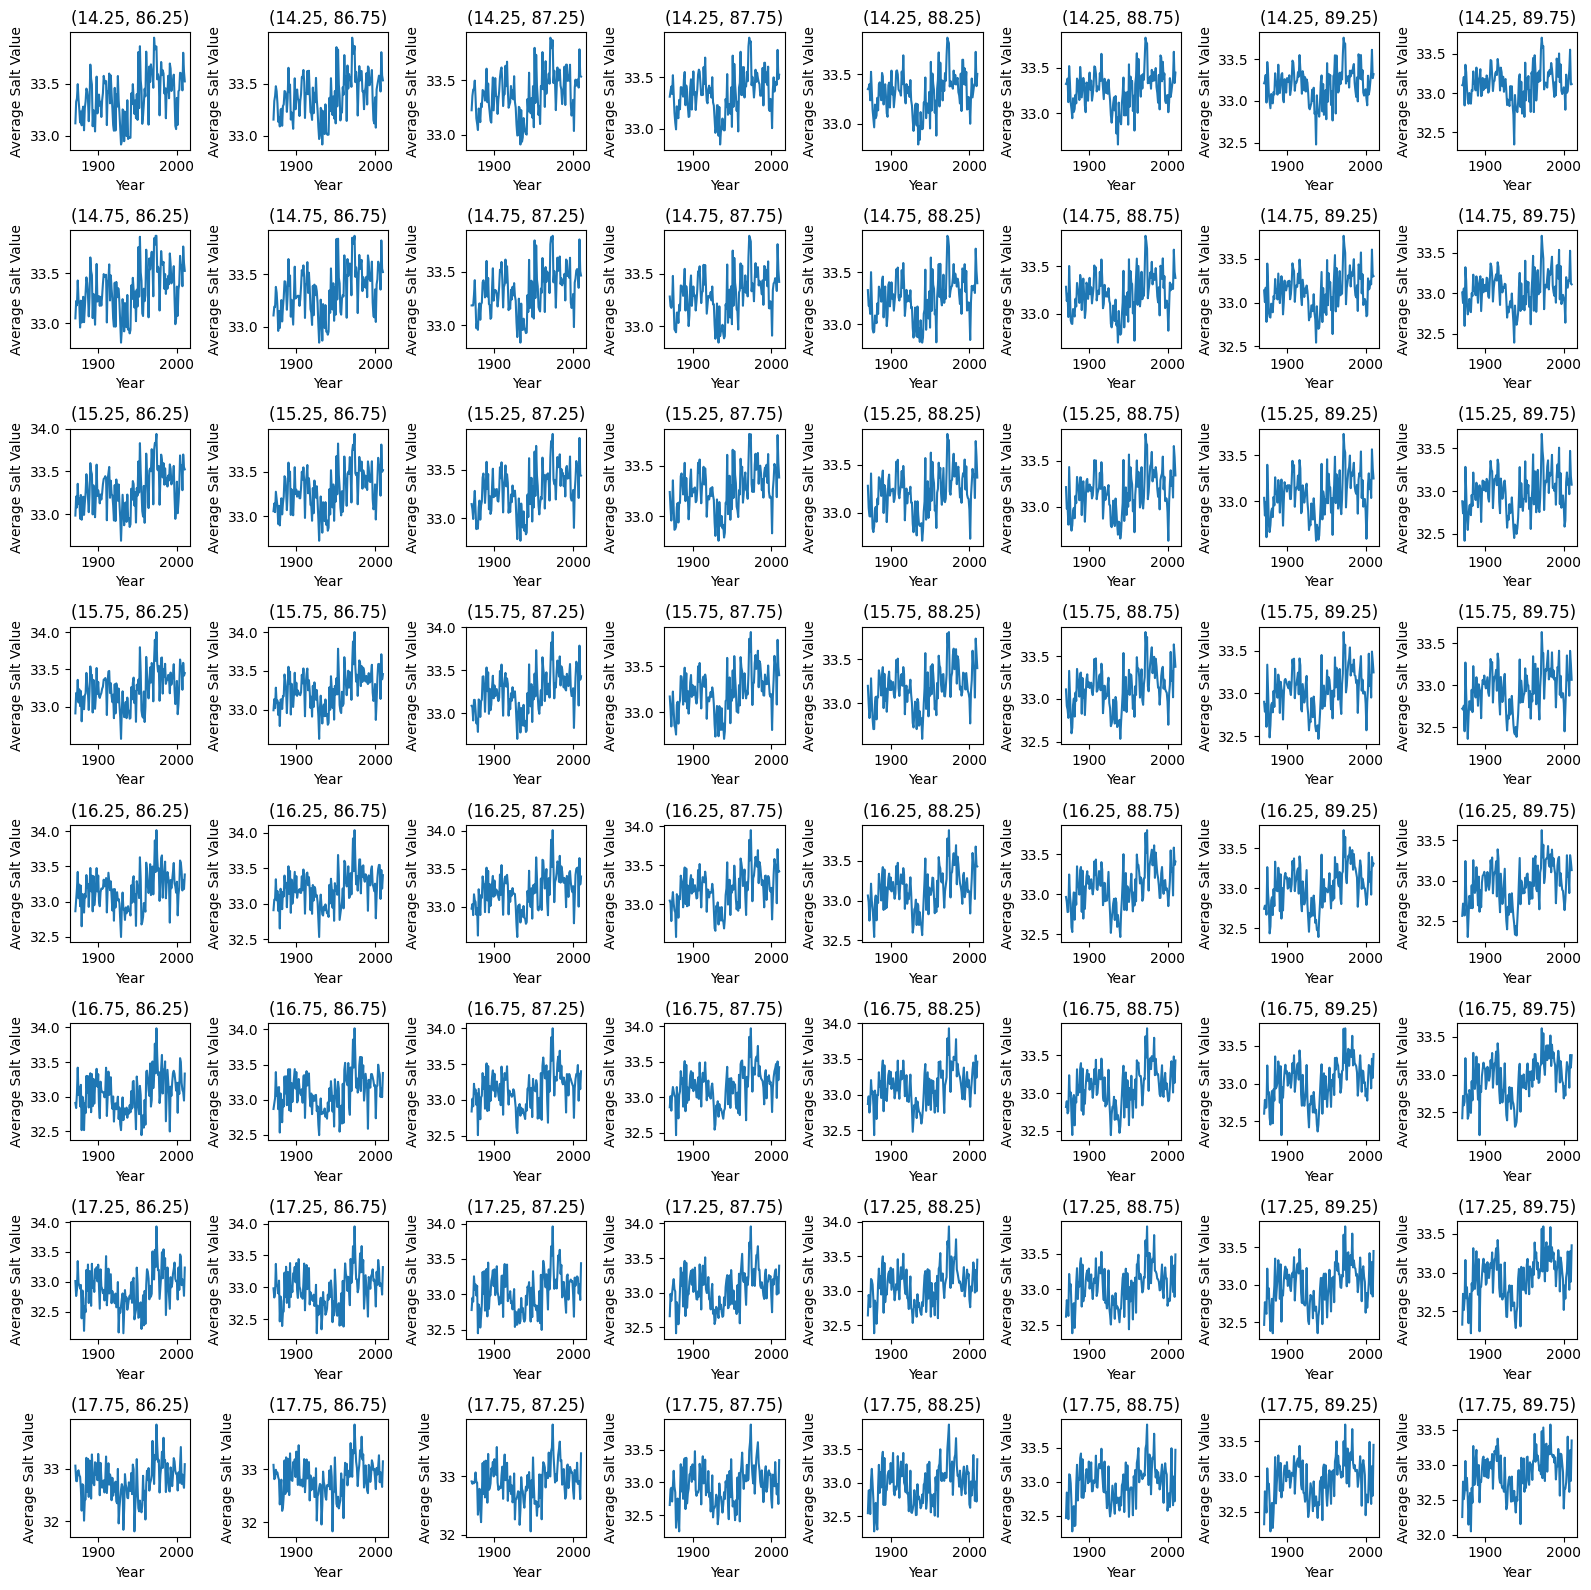

In [37]:
# Create a function to visualize each subset in a smaller subplot
def visualize_subset(subset, ax, c_value, d_value):
    # Calculate the average of 'a' and 'salt_value' for every 12 entries
    subset = subset.groupby(subset.index // 12).mean()

    # Create a line plot of the average 'salt_value' against 'Year'
    ax.plot(range(1871, 2011), subset['salt_value'], label='Average Salt Value')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Salt Value')
    ax.set_title(f'({c_value}, {d_value})')

# Calculate the number of rows and columns for subplots
unique_c_values = df['c'].unique()
unique_d_values = df['d'].unique()
num_rows = 8  # 8 rows for 64 graphs
num_cols = 8  # 8 columns for 64 graphs

# Create subplots based on the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Loop through each subset and visualize it in a subplot
for i, c_value in enumerate(unique_c_values[:num_rows]):
    for j, d_value in enumerate(unique_d_values[:num_cols]):
        # Load the subset from the CSV file
        subset = pd.read_csv(f"subset/subset_c{c_value}_d{d_value}.csv")
        ax = axes[i, j]
        visualize_subset(subset, ax, c_value, d_value)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Either polynomial regression with higher degrees will perform better (Asumming no overfitting takes place) or neural network with 1000's of epochs. But there is always risk of overfitting the data. 

We don't have that much computational power to perfom training on those models

## Gradient Boosting